# NLTK Chapter 6

## Learning to Classify Text

*The html version of this chapter in the book is available [here](https://www.nltk.org/book/ch06.html "ch06").*

### 1 Supervised Classification

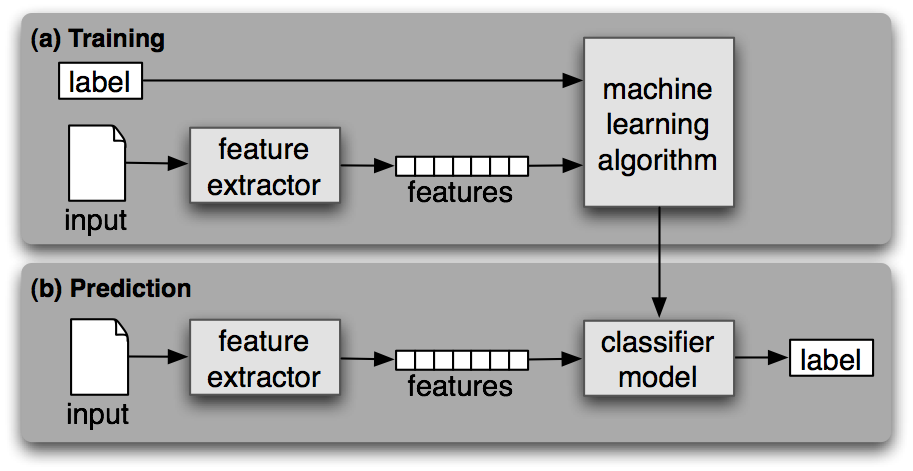

In [6]:
from IPython.display import display, Image

display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\supervised-classification.png"))

#### 1.1 Gender Identification

*Guessing the gender of a name based on the last letter:*

In [34]:
def gender_features(word):
    return {'last_letter': word[-1]}

In [2]:
import nltk, random
from nltk.corpus import names

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])

random.shuffle(labeled_names)

*Creating feature, training, and test sets:*

In [36]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [37]:
classifier.classify(gender_features('Neo'))

'male'

In [38]:
classifier.classify(gender_features('Trinity'))

'female'

*Finding accuracy:*

In [39]:
print(nltk.classify.accuracy(classifier, test_set))

0.776


*Most informative features:*

In [40]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     33.4 : 1.0
             last_letter = 'k'              male : female =     32.9 : 1.0
             last_letter = 'f'              male : female =     16.5 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0


__Your Turn__: Modify the `gender_features()` function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative. Retrain the classifier with these new features, and test its accuracy.

In [41]:
def gender_features(word):
    return {'last_letter': word[-1],
            'length'     : len(word)}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.776


In [71]:
def gender_features(word):
    return {'last_letter' : word[-1],
            'length'      : len(word),
            "first_letter": word[0]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.798


In [73]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            "first_letter" : word[0],
            "number_vowels": sum([1 for ch in word if ch in 'AEIOUaeiouy'])}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.794


*It appears that counting the number of vowels confuses the classifier slightly...*

In [44]:
classifier.show_most_informative_features(30)

Most Informative Features
             last_letter = 'a'            female : male   =     33.4 : 1.0
             last_letter = 'k'              male : female =     32.9 : 1.0
             last_letter = 'f'              male : female =     16.5 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0
             last_letter = 'd'              male : female =     10.2 : 1.0
             last_letter = 'o'              male : female =      8.3 : 1.0
             last_letter = 'm'              male : female =      8.3 : 1.0
            first_letter = 'z'              male : female =      7.1 : 1.0
            first_letter = 'k'              male : female =      7.0 : 1.0
             last_letter = 'r'              male : female =      6.2 : 1.0
             last_letter = 'w'              male : female =      5.0 : 1.0
             last_letter = 'g'              male : female =      5.0 : 1.0

In [74]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.812


In [75]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2]}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.814


In [76]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0]}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.814


In [80]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'second_letter': word[1],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0]}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.808


*The position of the first vowel also seems to confuse the classifier. Saving a list with all the features may take up a large amount of memory.  `nltk.classify.apply_features` returns an object that acts like a list but does not sotre all the feature sets in memory:*

In [78]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

In [79]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.808


#### 1.2 Choosing the Right Features



In [81]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [83]:
print(gender_features2('John'), end = '')

{'first_letter': 'j', 'last_letter': 'n', 'count(a)': 0, 'has(a)': False, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 0, 'has(d)': False, 'count(e)': 0, 'has(e)': False, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 1, 'has(h)': True, 'count(i)': 0, 'has(i)': False, 'count(j)': 1, 'has(j)': True, 'count(k)': 0, 'has(k)': False, 'count(l)': 0, 'has(l)': False, 'count(m)': 0, 'has(m)': False, 'count(n)': 1, 'has(n)': True, 'count(o)': 1, 'has(o)': True, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 0, 'has(r)': False, 'count(s)': 0, 'has(s)': False, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}

*This classifier actually performs worse.  Having too many features will cause the classifier to __overfit__ to the training set, and it will thus have problems generalizing to the observations in the test set:*

In [84]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.784


*One way to refine the feature is __error analysis__.  We'll make a __development set__, which contains the __training set__ and the __dev-test__ set.  The __dev-test__ has to be kept separate from the test set:*

In [85]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [86]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.802


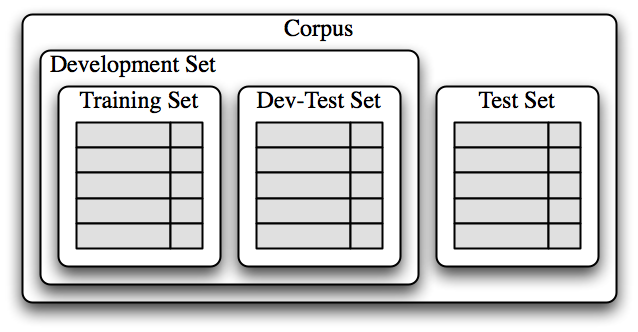

In [7]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\corpus-org.png"))

*__Figure 1.3:__ Organization of corpus data for training supervised classifiers. The corpus data is divided into two sets: the development set, and the test set. The development set is often further subdivided into a training set and a dev-test set.*

*Compiling the errors:*

In [89]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

*We can then examine the errors:*

In [102]:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Alison                        
correct=female   guess=male     name=Allison                       
correct=female   guess=male     name=Ardeen                        
correct=female   guess=male     name=Astrid                        
correct=female   guess=male     name=Austin                        
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Avril                         
correct=female   guess=male     name=Bamby                         
correct=female   guess=male     name=Barby                         
correct=female   guess=male     name=Beatriz                       
correct=female   guess=male     name=Brear                         
correct=female   guess=male     name=Bridget                       
correct=female   guess=male     name=Britaney                      
correct=female   guess=male     name=Bunnie                        
correct=female   guess=male     name=Cameo      

*I noticed doubled letters are quite common in the mistaken names, so I decided to make that a feature:*


In [105]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}
            

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.816


#### 1.3 Document Classification

*Looking at movie reviews to build a classifier to determine if a review is positive or negative:*

In [3]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

*Making a feature extractor.  We'll make a list of the 2,000 most common words in the corpus, and then check for the presence of these words in a given document:*

In [4]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)]  = (word in document_words)
    return features

In [5]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt')))

{'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': False, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': True, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': True, 'contains(into)': True, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': True, 'contains(continues)': False, 'contains(see)': False, 'contains(him)': True, 'contains(in)': True, 'contains(her)': False, 'contains(life)': False, 'contains(has)': True, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'contains

*Now we can train a classifier, and then check its accuracy:*

In [8]:
featuresets = [(document_features(d), c) for (d, c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.78


*Most informative features.  As was the case with the accuracy, the figures will be slightly different from the book, since our test set was randomly selected from the entire corpus, and thus is different from the one that was used in the book.*

In [9]:
classifier.show_most_informative_features(5)

Most Informative Features
 contains(unimaginative) = True              neg : pos    =      8.4 : 1.0
        contains(shoddy) = True              neg : pos    =      7.0 : 1.0
        contains(turkey) = True              neg : pos    =      6.8 : 1.0
     contains(atrocious) = True              neg : pos    =      6.6 : 1.0
    contains(schumacher) = True              neg : pos    =      6.6 : 1.0


#### 1.4 Part-of-Speech Tagging

*Working out what the most informative suffixes for a part-of-speech tagger would be:*

In [10]:
from nltk.corpus import brown
suffix_fdist = nltk.FreqDist()
for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1

In [11]:
common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]
print(common_suffixes)

['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of', 'the', 'y', 'r', 'to', 'in', 'f', 'o', 'ed', 'nd', 'is', 'on', 'l', 'g', 'and', 'ng', 'er', 'as', 'ing', 'h', 'at', 'es', 'or', 're', 'it', '``', 'an', "''", 'm', ';', 'i', 'ly', 'ion', 'en', 'al', '?', 'nt', 'be', 'hat', 'st', 'his', 'th', 'll', 'le', 'ce', 'by', 'ts', 'me', 've', "'", 'se', 'ut', 'was', 'for', 'ent', 'ch', 'k', 'w', 'ld', '`', 'rs', 'ted', 'ere', 'her', 'ne', 'ns', 'ith', 'ad', 'ry', ')', '(', 'te', '--', 'ay', 'ty', 'ot', 'p', 'nce', "'s", 'ter', 'om', 'ss', ':', 'we', 'are', 'c', 'ers', 'uld', 'had', 'so', 'ey']


*Now we'll define a feature extractor function that checks a word for these:*

In [12]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endwsith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

*Training a classifier.  Runs quite slowly.*

In [14]:
tagged_words = brown.tagged_words(categories = 'news')
featuresets = [(pos_features(n), g) for (n, g) in tagged_words]
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.6270512182993535

In [15]:
classifier.classify(pos_features('cats'))

'NNS'

*We can instruct NLTK to print the decision tree as pseudocode:*

In [18]:
print(classifier.pseudocode(depth = 6))

if endwsith(the) == False: 
  if endwsith(,) == False: 
    if endwsith(s) == False: 
      if endwsith(.) == False: 
        if endwsith(of) == False: 
          if endwsith(and) == False: return '.'
          if endwsith(and) == True: return 'CC'
        if endwsith(of) == True: return 'IN'
      if endwsith(.) == True: return '.'
    if endwsith(s) == True: 
      if endwsith(is) == False: 
        if endwsith(was) == False: 
          if endwsith(as) == False: return 'PP$'
          if endwsith(as) == True: return 'CS'
        if endwsith(was) == True: return 'BEDZ'
      if endwsith(is) == True: 
        if endwsith(his) == False: return 'BEZ'
        if endwsith(his) == True: return 'PP$'
  if endwsith(,) == True: return ','
if endwsith(the) == True: return 'AT'



#### 1.5 Exploiting Context

*Of course, the tagger will be even more accurate if it can take advantage of a word's context:*

In [21]:
def pos_features(sentence, i):
    features = {"suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["prev-word"] = sentence[i - 1]
    return features

In [22]:
pos_features(brown.sents()[0], 8)

{'suffix(1)': 'n', 'suffix(2)': 'on', 'suffix(3)': 'ion', 'prev-word': 'an'}

In [24]:
featuresets = []
tagged_sents = brown.tagged_sents(categories = 'news')
for tagged_sent in tagged_sents:
    untagged_sent = nltk.tag.untag(tagged_sent)
    for i, (word, tag) in enumerate(tagged_sent):
        featuresets.append( (pos_features(untagged_sent, i), tag) )

size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.7891596220785678

#### 1.6 Sequence Classification 

__Joint classifier__ models choose an appropriate labeling for a collection of related inputs.  With part-of-speech tagging, a number of different __sequence classifier__ models can be utilized to jointly choose part-of-speech tags for words in a given sentence.

__Consecutive classification__ (a.k.a. __greedy sequence classification__) finds the most likely class label for the first input, and then uses this to find the best label for the next input.  This process is repeated until all the inputs have been labeled.  

*We can update `pos_features` to store the tags of the previous word, and from there build our sequence classifier:*

In [26]:
def pos_features(sentence, i, history):
    features = {"suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
        features["prev-tag"] = "<START>"
    else:
        features["prev-word"] = sentence[i - 1]
        features["prev-tag"] = history[i - 1]
    return features

class ConsecutivePosTagger(nltk.TaggerI):
    
    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = pos_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)
        
    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = pos_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

In [27]:
tagged_sents = brown.tagged_sents(categories = 'news')
size = int(len(tagged_sents) * 0.1)
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]
tagger = ConsecutivePosTagger(train_sents)
print(tagger.evaluate(test_sents))

0.7980528511821975


#### 1.7 Other Methods for Sequence Classification

One shortcoming of this approach is that the labels cannot be revised once they are assigned.  A solution is to adopt a transformational strategy instead.  In such a strategy, labels are iteratively refined to repair inconsistencies between related inputs.  The Brill Tagger is an example of this.

Another solution is assign scores to all possible sequences of POS tags, and then choose the sequence with the highest overall score.  This is the approach used by __Hidden Markov Models__.  One problem is that the number of possible tag sequences can be very large, so normally we'll only look at the most recent $n$ tags.  

### 2 Further Examples of Supervised Classification

#### 2.1 Sentence Segmentation

Trying to extract features from sentences that have already been segmented:

In [28]:
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0
for sent in sents:
    tokens.extend(sent)
    offset += len(sent)
    boundaries.add(offset - 1)

Specifying the features of the data that will be used in order to decide whether punctuation indicates a sentence-boundary:

In [29]:
def punct_features(tokens, i):
    return {'next-word-capitalized': tokens[i + 1][0].isupper(),
            'prev-word': tokens[i - 1].lower(),
            'punct': tokens[i],
            'prev-word-is-one-char': len(tokens[i - 1]) == 1}

Select all punctuation tokens and tagger whether they are boundary tokens:

In [30]:
featuresets = [(punct_features(tokens, i), (i in boundaries))
                for i in range(1, len(tokens) - 1)
                if tokens[i] in '.?!']

Training and evaluating a punctuation classifier:

In [31]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.936026936026936

Sentence segmenter:

In [32]:
def segment_sentences(words):
    start = 0
    sents = []
    for i, word in enumerate(words):
        if word in '.?!' and classifier.classify(punct_features(word, i)) == True:
            sents.append(words[start:i + 1])
            start = i + 1
    if start < len(words):
        sents.append(words[start:])
    return sents

#### 2.2 Identifying Dialogue Act Types

Recognizing the __dialogue acts__ behind the utterances in a dialogue can be an important initial step in understanding a conversation.

The posts in NPS Chat Corpus have been labeled with one of 15 dialogue act types.  We can build a classifier that can identify the dialogue act types for new messages.  We can extract the basic messaging data by calling `xml_posts()` to get a data structure representing the XML annotation for each post.

In [33]:
posts = nltk.corpus.nps_chat.xml_posts()[:10000]

This feature extractor checks what words the post contains:

In [34]:
def dialogue_act_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
    return features

Build the classifier:

In [36]:
featuresets = [(dialogue_act_features(post.text), post.get('class'))
                for post in posts]
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.667


#### 2.3 Recognizing Textual Entailment (RTE)

RTE could be thought of as making logical inferences about a text.  RTE can achieve fairly good results on shallow analysis alone (i.e., the similarity between the text and hypothesis at the word level).  

The RTE feature detector below measures the amount of word overlap between the text and the hypothesis.  Named Entity mentions are likely to be more important than words.

In [37]:
def rte_features(rtepair):
    extractor = nltk.RTEFeatureExtractor(rtepair)
    features = {}
    features['word_overlap'] = len(extractor.overlap('word'))
    features['word_hyp_extra'] = len(extractor.hyp_extra('word'))
    features['ne_overlap'] = len(extractor.overlap('ne'))
    features['ne_hyp_extra'] = len(extractor.hyp_extra('ne'))
    return features

An example:

In [41]:
rtepair = nltk.corpus.rte.pairs(['rte3_dev.xml'])[33]
extractor = nltk.RTEFeatureExtractor(rtepair)
print(extractor.text_words)

{'central', 'meeting', 'SCO', 'that', 'Organisation', 'association', 'representing', 'Co', 'Soviet', 'China', 'fight', 'republics', 'Iran', 'binds', 'terrorism.', 'Russia', 'Shanghai', 'Parviz', 'four', 'former', 'together', 'Davudi', 'Asia', 'was', 'at', 'fledgling', 'operation'}


In [42]:
print(extractor.hyp_words)

{'member', 'SCO.', 'China'}


In [43]:
print(extractor.overlap('word'))

set()


In [44]:
print(extractor.overlap('ne'))

{'China'}


In [45]:
print(extractor.hyp_extra('word'))

{'member'}


#### 2.4 Scaling Up to Large Datasets

Python isn't as efficient with large datasets.  NLTK has facilities for interfacing with external machine learning packages.  

*__N.B.__ I searched for these but was unable to find anything...*

### 3 Evaluation

#### 3.1 The Test Set

The size of the test set should be chosen so that the least frequent label occurs at least 50 times.

The book recommends that when using the Brown Corpus, we should __not__ shuffle the sentences.  The reason is that shuffling the corpus almost guarantees that sentences from the same documents will be in both the training and the test sets, and therefore the resulting classifier will not generalize well to other documents.  The book even goes so far as to recommend using different categories from the Brown Corpus for the training and the test sets.

#### 3.2 Accuracy

Accuracy is not a reliable metric when dealing with very rare phenomena.  E.g., if we tested a disease that occurred only once in 10,000 instances, we could label all the tests 'negative' and still achieve 99.99% accuracy; but the test would be meaningless, as it fails to identify what it's supposed to test.

#### 3.3 Precision and Recall

* __False positives__ are __Type I errors__
* __False negatives__ are __Type II errors__

* __Precision__ (the proportion of relevant items amongst the items we identified) is $\frac{TP}{(TP + FP)}$
* __Recall__ (the proportion of relevant items we identified over all the relevant items) is $\frac{TP}{(TP + FN)}$
* __F-Measure__ (or __F-Score__) is the harmonic mean of precision and recall: $\frac{(2 \times Precision \times Recall)}{(Precision + Recall)}$

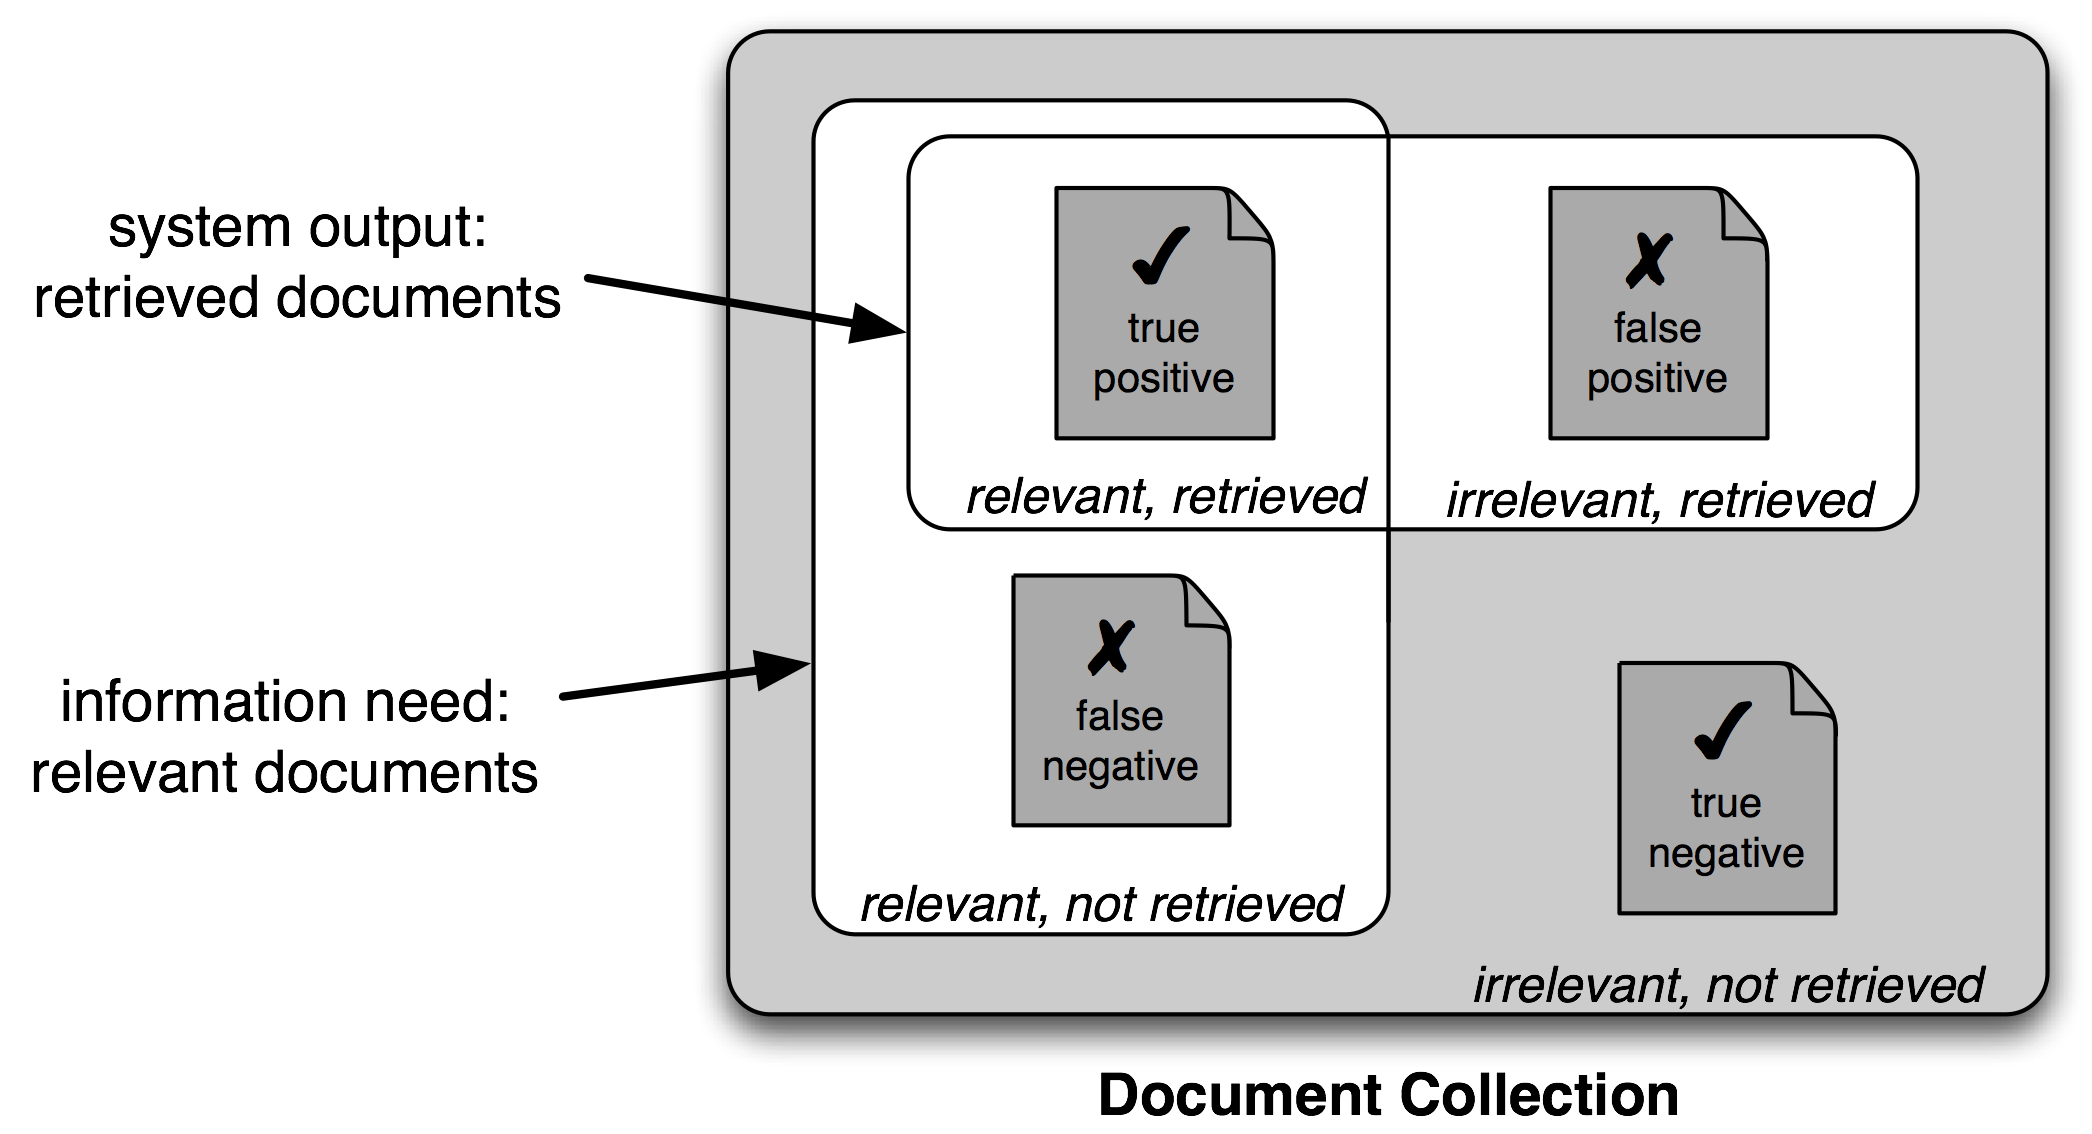

In [46]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\precision-recall.png"))

#### 3.4 Confusion Matrices



In [51]:
def tag_list(tagged_sents):
    return [tag for sent in tagged_sents for (word, tag) in sent]
def apply_tagger(tagger, corpus):
    return [tagger.tag(nltk.tag.untag(sent)) for sent in corpus]

# this was left out of the book, however, it's clear in line 13
# that we need a tagger
tagged_sents = brown.tagged_sents(categories = 'news')
size = int(len(tagged_sents) * 0.1)
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]

t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff = t0)
t2 = nltk.BigramTagger(train_sents, backoff = t1)

gold = tag_list(brown.tagged_sents(categories = 'editorial'))
test = tag_list(apply_tagger(t2, brown.tagged_sents(categories = 'editorial')))
cm = nltk.ConfusionMatrix(gold, test)
print(cm.pretty_format(sort_by_count = True, show_percents = True, truncate = 9))

    |                                         N                      |
    |      N      I      A      J             N             V      N |
    |      N      N      T      J      .      S      ,      B      P |
----+----------------------------------------------------------------+
 NN | <11.9%>  0.0%      .   0.2%      .   0.0%      .   0.2%   0.0% |
 IN |   0.0%  <9.0%>     .      .      .   0.0%      .      .      . |
 AT |      .      .  <8.6%>     .      .      .      .      .      . |
 JJ |   1.7%      .      .  <4.0%>     .      .      .   0.0%   0.0% |
  . |      .      .      .      .  <4.8%>     .      .      .      . |
NNS |   1.4%      .      .      .      .  <3.3%>     .      .   0.0% |
  , |      .      .      .      .      .      .  <4.4%>     .      . |
 VB |   1.0%      .      .   0.0%      .      .      .  <2.4%>     . |
 NP |   1.0%      .      .   0.0%      .      .      .      .  <1.9%>|
----+----------------------------------------------------------------+
(row =

The rows represent the reference tags (i.e., what they should be), while the columns represent the test tags (i.e., what they were actually labelled.  So, in this example, 1.7% of the words were labeled `NN` when they were actually `JJ`.

#### 3.5 Cross-Validation

Cross Validation (such as $k$-folds validation) is very valuable when we only have a limited amount of annotated data.  It also allows us to see how consistent our training data is.

### 4 Decision Trees

Decision trees consist of __decision nodes__, which check feature values, and __leaf nodes__, which assign labels, and the __root node__, which is where the decision tree begins.  

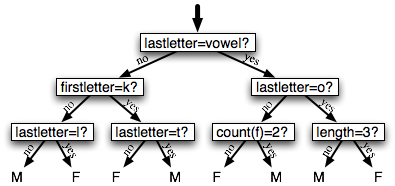

In [52]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\decision-tree.png"))

#### 4.1 Entropy and Information Gain

__Information gain__ measures how much more organized the input values become when we divide them up using a given feature.  To measure how disorganized the original set of input values are, we calculate entropy of their labels, which will be high if the input values have highly varied labels, and low if many input values all have the same label.  I.e., entropy is defined as the sum of the probability of each label times the log probability of that same label:

$$(1)\quad H = -\Sigma_{l \text{ in } labels} P(l) \times log_2P(l)$$

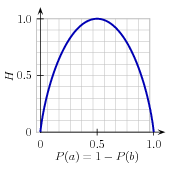

In [54]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\Binary_entropy_plot.png"))

The code below shows how the entropy of labels in the name gender prediction task depends on the ratio of male to female names:

In [55]:
import math
def entropy(labels):
    freqdist = nltk.FreqDist(labels)
    probs = [freqdist.freq(l) for l in freqdist]
    return -sum(p * math.log(p, 2) for p in probs)

In [56]:
print(entropy(['male', 'male', 'male', 'male']))

-0.0


In [57]:
print(entropy(['male', 'female', 'male', 'male']))

0.8112781244591328


In [58]:
print(entropy(['female', 'male', 'female', 'male']))

1.0


In [59]:
print(entropy(['female', 'female', 'male', 'female']))

0.8112781244591328


In [60]:
print(entropy(['female', 'female', 'female', 'female']))

-0.0


If we can calculate the entropy of the values, we can determine how much more organized the labels would be at a certain __decision stump__, which is a single node that decides how to classify inputs based on a single feature.  We would calculate the entropy for each of the stump's leaves, take the average of those leaf entropy values, and then determine the information gain by subtracting the new entropy value from the original.  The higher the information gain, the better job the decision stump does of dividing the input values into coherent groups.

While decision trees are easy to understand and interpret, they also split the training data at each branch.  Consequently, lower decision nodes may overfit the training set.  This can be avoided by not dividing nodes once the amount of training data is too small; another approach involves pruning decision nodes that do not improve performance on a dev-test.

Another problem is that decision trees may force features to be checked in a certain order, even if such features are independent of each other.  This may lead to certain features being checked multiple times in different parts of the tree.  

A final problem is that decision trees do not efficiently use features that are weak predictors of the correct label. Since these features make relatively small incremental improvements, they tend to occur very low in the decision tree, at which point there is very little training data.  

### 5 Naive Bayes Classifiers

In __naive Bayes__ classifiers, every feature gets a say into determining the label.  The classifier calculates the __prior probability__ of each label by checking its frequency in the training set.  Contributions from each feature are combined with the prior probability to arrive at a likelihood estimate for each label.



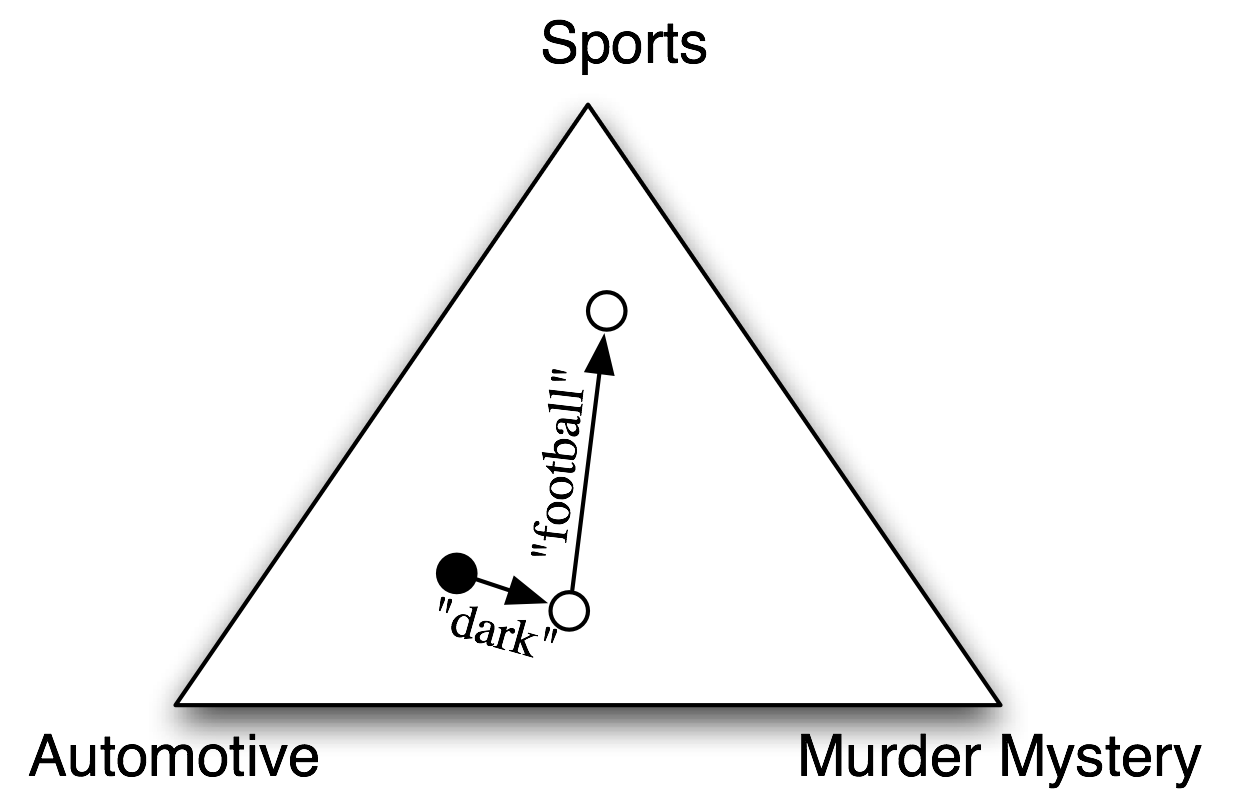

In [61]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\naive-bayes-triangle.png"))

*__Figure 5.1__: An abstract illustration of the procedure used by the naive Bayes classifier to choose the topic for a document. In the training corpus, most documents are automotive, so the classifier starts out at a point closer to the "automotive" label. But it then considers the effect of each feature. In this example, the input document contains the word "dark," which is a weak indicator for murder mysteries, but it also contains the word "football," which is a strong indicator for sports documents. After every feature has made its contribution, the classifier checks which label it is closest to, and assigns that label to the input.*

Individual features make their contributions to the overall decision by "voting against" labels that don't occur with that feature very often.  The likelihood score for each label is reduced by multiplying it by the probability that an input value with that label would have the feature.  E.g., if *run* occurs in 12% of the sports docs, 10% of the murder mystery docs, and 2% of the automotive docs, then the likelihood scores would respectively be multiplied by .12, .1, and .02 for the labels sports, murder mystery, and automotive.

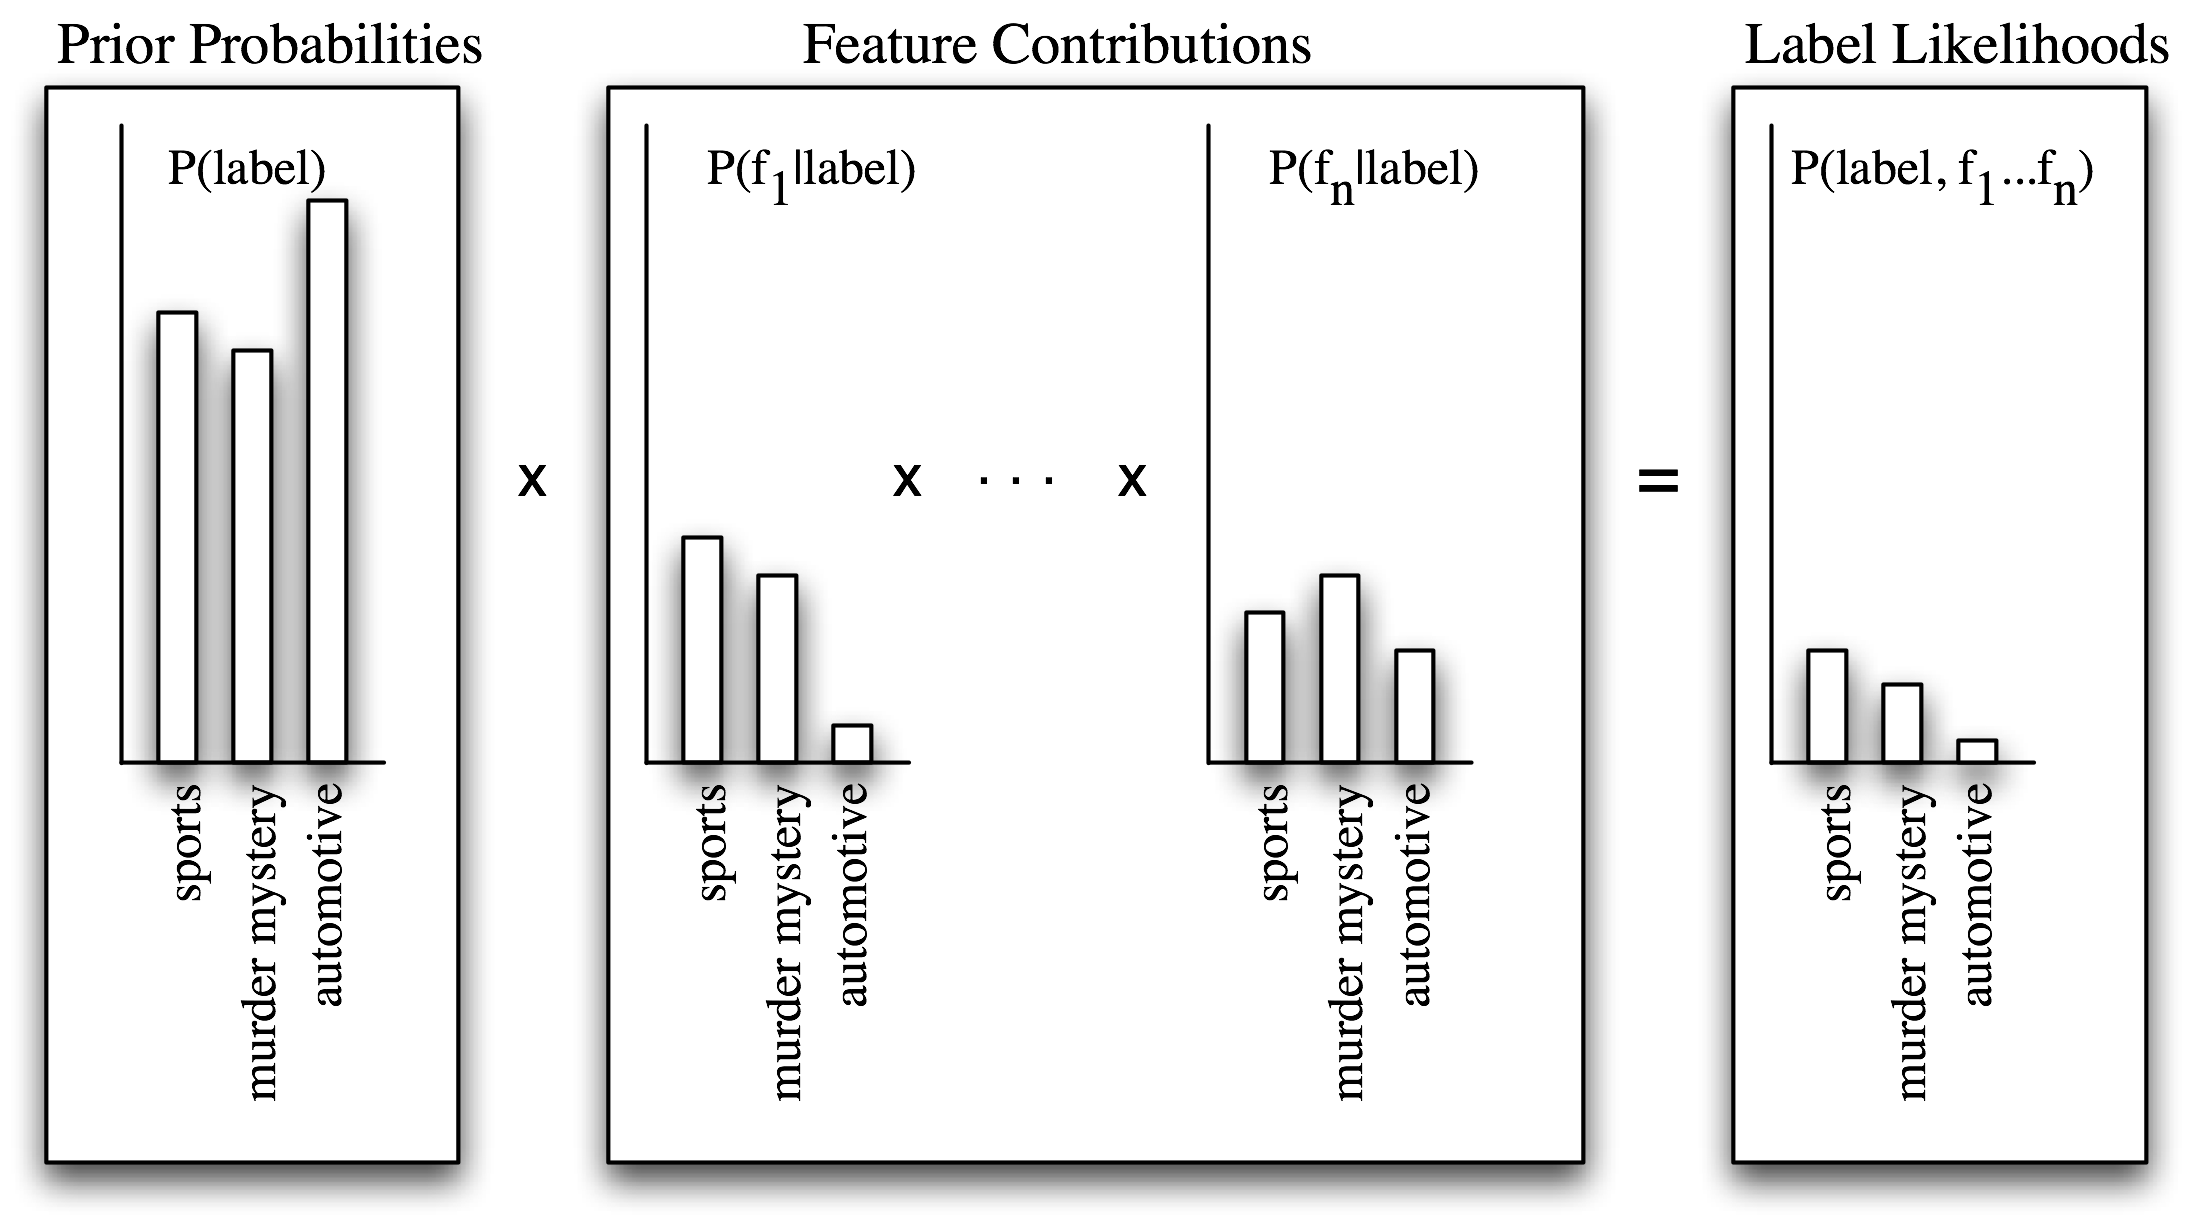

In [63]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\naive_bayes_bargraph.png"))

#### 5.1   Underlying Probabilistic Model

The naive Bayes classifier assumes the features are independent of each other, which is an unrealistic assumption.  But it makes it easier to combine the contributions of the different features.

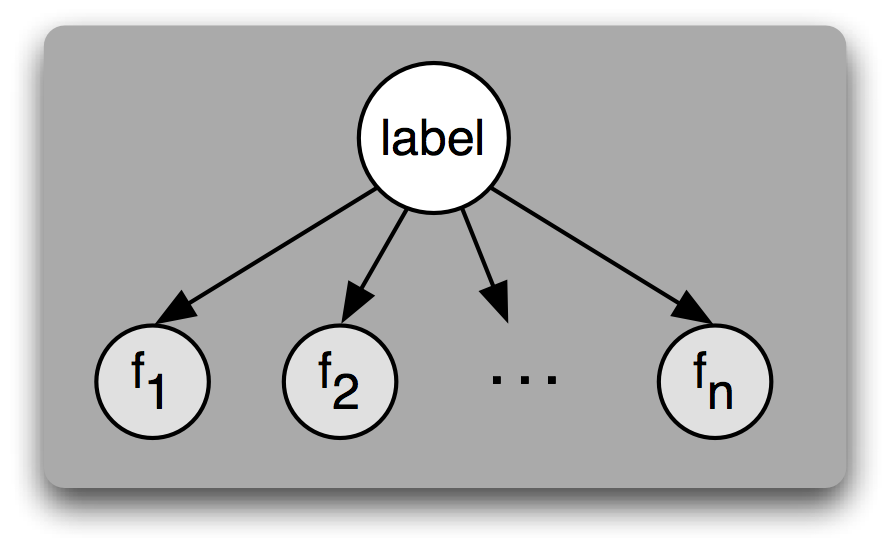

In [64]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\naive_bayes_graph.png"))

*__Figure 5.3__: A __Bayesian Network Graph__ illustrating the generative process that is assumed by the naive Bayes classifier. To generate a labeled input, the model first chooses a label for the input, then it generates each of the input's features based on that label. Every feature is assumed to be entirely independent of every other feature, given the label.*

We can use this assumption to calculate $P(label|features)$, the probability an input will have a particular label given it has a particular set of features.  We will simply pick the label $l$ that maximizes $P(l|features)$.  We can use Bayes' law to calculate this:

$$(2) \quad P(label|features) = \frac{P(features, label)}{P(features)}$$

Since $P(features)$ will be the same for every choice of label, it will suffice to calculate $P(features, label) if we just want to find the most likely label.

To generate a probability estimate for each label, we should calculate the sum of labels of $P(features, label)$:

$$(3) \quad P(features) = \Sigma_{l \text{  in  } labels} P(features, label)$$

We can expand the label likelihood thusly:

$$(4) \quad P(features, label) = P(label) \times P(features|label)$$

We can also separate the probability of each individual feature:

$$(5) \quad P(features, label) = P(label) \times P_{f \text {  in  } features} P(f|label)$$


#### 5.2 Zero Counts and Smoothing

The simplest way to calculate the contribution of a feature toward the label likelihood ($P(f|label)$) is to take the percentage of training instances with the given label that also have the given feature:

$$(6) \quad P(f|label) = \frac{count(f, label)}{count(label)}$$

But this won't work if a feature *never* occurs with a given label in the training set, since the figure will be zero.  We would need to use a __smoothing__ technique to deal with this, such as using the __Expected Likelihood Estimation__, which adds 0.5 to each $count(f, label)$ valued, and the __Heldout Estimation__ uses a heldout corpus to calculate the relationship between feature frequencies and feature probabilities.  

#### 5.3 Non-Binary Features

Label-valued features (e.g., colors) can be converted to binary by replacing them with binary features (e.g., "is-red"). Numeric features can be binned.  Another possibility is to use regression models.  

#### 5.4 The Naivete of Independence

Since features are usually interconnected, by ignoring their dependence we run the risk of double counting the effect of highly correlated features.  

#### 5.5 The Cause of Double Counting

To account for double counting, we could consider the possible interactions between feature contributions during training.  The following equation separates out the contribution made by each feature:

$$(7) \quad P(features, label) = w[label] \times Prod_{f \text{ in } features} w[f, label]$$

The values $w[label]$ and $w[f, label]$ are the __parameters__ (or __weights__) for the model.  We can set each of these parameters independently with the naive Bayes algorithm.

$$(8) \quad w[label] = P(label)$$

$$(9) \quad w[f, label] = P(f|label)$$

### 6 Maximum Entropy Classifiers

The __Maximum Entropy__ classifier uses a model that utilizes search techniques to find a set of parameters that will maximize the performance of the classifier.  Specifically, it looks for the set of parameters that maximizes the __total likelihood__ of the training corpus, which is defined as:

$$(10) \quad P(features) = \Sigma_{x \text{  in  } corpus} P(label(x)|features(x))$$

The probability that an input whose features are `features` will have class label `label` is 

$$(11) \quad P(label|features) = \frac{P(label, features)}{\Sigma_{label}P(label, features)}$$

Because of the potentially complex interactions between the effects of related features, there is no way to directly calculate the model parameters that maximize the likelihood of the training set.  ME classifiers use __iterative optimization__ techniques, which start by using random values for the model's parameters and then repeatedly refine those parameters to bring them closer to the optimal solution.  Although each step brings the parameters closer to the optimal values, it is difficult to determine when those optimal values have been reached.  Therefore, it can take a long time to learn parameters, especially if the size of the training set, the number of features, or the number of labels is large.

#### 6.1 The Maximum Entropy Model

The ME classifier model lets the user decide what combination of labels and features should receive their own parameters.  It is possible to use a single parameter to associate a feature with more than one label, or to associate more than one feature with a given lable.  This will sometimes allow the model to "generalize" over some of the differences between related labels or features.

Each combination of labels and features is called a __joint-feature__.  A join-feature is defined for each label, corresponding to $w[label]$, and for each combination of feature and lable, corresponding to $w[f, label]$.  The score assibned to a label for a given input is simply the product of the parameters associated with the joint-features that apply to that input and label:

$$P(input, label) = Prod_{joint-features(input, label)}w[joint-features]$$

#### 6.2 Maximizing Entropy

The intuition that motivates ME classification is that we should build a model that captures the frequences of individual joint-features without making any unwarranted assumptions.  E.g., suppose we have to choose from a list of ten possible senses (labeled A-J), but we don't know anything more about the word or the senses.  If we have a number of possible probability distributions such as these:


|       |  A  |   B  |  C  |  D  |  E  |  F  |  G  |  H  |  I  |
|:-----:|:---:|:----:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|  (i)  | 10% |  10% | 10% | 10% | 10% | 10% | 10% | 10% | 10% |
|  (ii) |  5% |  15% |  0% | 30% |  0% |  8% | 12% |  0% |  6% |
| (iii) |  0% | 100% |  0% |  0% |  0% |  0% |  0% |  0% |  0% |

We are more likely to choose $(i)$, because its entropy is higher than the others.  The __Maximum Entropy principle__ states that among the distributions that are consistent with what we know, we should choose the distribution whose entropy is highest.

Another example: Suppose that we know that sense A appears 55\% of the time.  Again, we have a number of distributions to choose from:

|      |  A  |  B  |  C |  D |  E |  F |  G |  H  |  I |
|:----:|:---:|:---:|:--:|:--:|:--:|:--:|:--:|:---:|:--:|
| (iv) | 55% | 45% | 0% | 0% | 0% | 0% | 0% |  0% | 0% |
|  (v) | 55% |  5% | 5% | 5% | 5% | 5% | 5% |  5% | 5% |
| (vi) | 55% |  3% | 1% | 2% | 9% | 5% | 0% | 25% | 0% |

In this instance, $(v)$ has the highest entropy, and in the absence of more information we should choose this one. 

In the final example: suppose we know that the word "up" appears in the nearby context 10\% of the time, and when it does appear there's an 80\% chance that sense A or C will be used.  In this case, the following distributions look appropriate:

|       |     |    A   |   B   |   C   |   D   |   E   |   F   |   G   |   H   |   I   |   J   |
|:-----:|:---:|:------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| (vii) | +up |  5.10% | 0.25% | 2.90% | 0.25% | 0.25% | 0.25% | 0.25% | 0.25% | 0.25% | 0.25% |
|  ` `  | -up | 49.90% | 4.46% | 4.46% | 4.46% | 4.46% | 4.46% | 4.46% | 4.46% | 4.46% | 4.46% |

#### 6.3 Generative vs Conditional Classifiers

The naive Bayes classifier is a __generative__ classifier which builds a model that predicts $P(input, label)$, the joint probability of a $(input, label)$ pair.  Generative modesl can be used to answer the following questions:

* 1. What is the most likely label for a given input?
* 2. How likely is a given label for a given input?
* 3. What is the most likely input value?
* 4. How likely is a given input value?
* 5. How likely is a given input value with a given label?
* 6. What is the most likely label for an input that might have one of two values (but we don't know which)?

The ME classifier is a __conditional__ classifier.  These build models that predict $P(label|input)$, i.e., the probability of a label *given* the input value. Conditional models can be used to answer the first two questions above, but not the remaining four.

Generative models are more powerful, sicne we can predict $P(label|input)$ from $P(input, label)$ but not vice versa.  But these models have more "free parameters" that need to be learned, even though the size of the training set is fixed.  As a result, we end up with less data that can be used to train each parameter's value, making it harder to find the best parameter values.  Consequently, the generative model may not do as well at answering questions 1 and 2 as a conditional model.  

### 7 Modeling Linguistic Patterns

#### 7.1 What do models tell us?

Descriptive models can capture patterns in data, but can't provide any information about *why* the data contain these patterns.  That's the job of explanatory models.

### 8 Summary

*__No notes.__*

### 9 Further Reading

*__No notes.__*

### 10 Exercises

##### 1. 

☼ Read up on one of the language technologies mentioned in this section, such as word sense disambiguation, semantic role labeling, question answering, machine translation, named entity detection. Find out what type and quantity of annotated data is required for developing such systems. Why do you think a large amount of data is required?

*Since this book was released there has been a tectonic shift in labeled models, and instead of using large corpora of annotated data the trend now is to use massive corpora of unlabeled data.  Simply put, we now have the computing power and data stores to analyze these massive amounts of data.  With models such as Word2Vec, machines can discover the relationships between semantic ideas with no need for human annotations.*

*To answer the question as it was posed: As was pointed out multiple times in this book, models can only discover phenomena that are present in their training data, and large corpora are required to guarantee that less frequent phenomena are represented often enough to be registered by the model.  Some models, such as decision trees, cannot learn phenomena unless they are represented a certain number of times.*

##### 2.

☼ Using any of the three classifiers described in this chapter, and any features you can think of, build the best name gender classifier you can. Begin by splitting the Names Corpus into three subsets: 500 words for the test set, 500 words for the dev-test set, and the remaining 6900 words for the training set. Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set. How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?

*Since we've practiced using Naive Bayes and Decision Trees, I decided I would try a Maximum Entropy Classifier, as we have only discussed this theoretically.  It wasn't so easy to find examples of ME in use, but I did find a brief one [here](http://www.nltk.org/howto/classify.html "MaxEnt Example").  With MaxEnt we have to designate the number of iterations.*

*I also spent a lot of time refining this classifier when I was working throught the notes in the chapter, so for this exercise I mostly just pulled out the code I used for that.*

In [65]:
def gender_features(word):
    return {'last_letter': word[-1]}

In [66]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [73]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.37313        0.764
             3          -0.37269        0.764
             4          -0.37243        0.764
             5          -0.37226        0.764
             6          -0.37213        0.764
             7          -0.37204        0.764
             8          -0.37197        0.764
             9          -0.37191        0.764
            10          -0.37186        0.764
            11          -0.37182        0.764
            12          -0.37179        0.764
            13          -0.37176        0.764
            14          -0.37173        0.764
            15          -0.37171        0.764
            16          -0.37169        0.764
            17          -0.37168        0.764
            18          -0.37166        0.764
            19          -0.37165        0.764
  

In [74]:
print(nltk.classify.accuracy(classifier, devtest_set))

0.722


In [77]:
devtest_names = labeled_names[500:1000]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

In [78]:
for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Abigail                       
correct = female   guess = male     name = Addis                         
correct = female   guess = male     name = Agnes                         
correct = female   guess = male     name = Alex                          
correct = female   guess = male     name = Ardeen                        
correct = female   guess = male     name = Bo                            
correct = female   guess = male     name = Bridget                       
correct = female   guess = male     name = Brier                         
correct = female   guess = male     name = Calypso                       
correct = female   guess = male     name = Caril                         
correct = female   guess = male     name = Ceil                          
correct = female   guess = male     name = Charil                        
correct = female   guess = male     name = Christal                      
correct = female   guess = male     na

In [79]:
def gender_features(word):
    return {'last_letter': word[-1],
            'length'     : len(word)}

In [80]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.44526        0.752
             3          -0.40201        0.768
             4          -0.38559        0.764
             5          -0.37825        0.764
             6          -0.37467        0.762
             7          -0.37282        0.762
             8          -0.37181        0.762
             9          -0.37124        0.762
            10          -0.37088        0.762
            11          -0.37066        0.762
            12          -0.37050        0.762
            13          -0.37038        0.762
            14          -0.37030        0.762
            15          -0.37023        0.762
            16          -0.37017        0.762
            17          -0.37012        0.762
            18          -0.37008        0.762
            19          -0.37004        0.762
  

In [81]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Addis                         
correct = female   guess = male     name = Agnes                         
correct = female   guess = male     name = Alex                          
correct = female   guess = male     name = Ardeen                        
correct = female   guess = male     name = Bo                            
correct = female   guess = male     name = Bridget                       
correct = female   guess = male     name = Brier                         
correct = female   guess = male     name = Calypso                       
correct = female   guess = male     name = Caril                         
correct = female   guess = male     name = Ceil                          
correct = female   guess = male     name = Charil                        
correct = female   guess = male     name = Christan                      
correct = female   guess = male     name = Coral                         
correct = female   guess = male     na

In [82]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}

In [83]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.47686        0.748
             3          -0.40863        0.807
             4          -0.37045        0.814
             5          -0.34687        0.821
             6          -0.33104        0.824
             7          -0.31973        0.825
             8          -0.31126        0.827
             9          -0.30468        0.829
            10          -0.29943        0.830
            11          -0.29513        0.831
            12          -0.29154        0.833
            13          -0.28850        0.835
            14          -0.28589        0.835
            15          -0.28361        0.836
            16          -0.28161        0.837
            17          -0.27983        0.837
            18          -0.27824        0.837
            19          -0.27681        0.837
  

In [84]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Abigail                       
correct = female   guess = male     name = Agnes                         
correct = female   guess = male     name = Alex                          
correct = female   guess = male     name = Bamby                         
correct = female   guess = male     name = Bo                            
correct = female   guess = male     name = Brier                         
correct = female   guess = male     name = Buffy                         
correct = female   guess = male     name = Calypso                       
correct = female   guess = male     name = Charil                        
correct = female   guess = male     name = Cyb                           
correct = female   guess = male     name = Devon                         
correct = female   guess = male     name = Dusty                         
correct = female   guess = male     name = Eran                          
correct = female   guess = male     na

In [85]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'number_vowels': sum([1 for ch in word if ch in 'AEIOUaeiouy']),
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}

In [86]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.370
             2          -0.48593        0.731
             3          -0.41851        0.804
             4          -0.37940        0.815
             5          -0.35468        0.820
             6          -0.33782        0.823
             7          -0.32564        0.824
             8          -0.31644        0.827
             9          -0.30924        0.830
            10          -0.30346        0.832
            11          -0.29870        0.833
            12          -0.29471        0.833
            13          -0.29131        0.834
            14          -0.28838        0.836
            15          -0.28582        0.838
            16          -0.28357        0.838
            17          -0.28156        0.838
            18          -0.27976        0.839
            19          -0.27814        0.839
  

In [87]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name))

for (tag, guess, name) in sorted(errors):
    print('correct = {:<8} guess = {:<8} name = {:<30}'.format(tag, guess, name))

correct = female   guess = male     name = Abigail                       
correct = female   guess = male     name = Agnes                         
correct = female   guess = male     name = Alex                          
correct = female   guess = male     name = Bamby                         
correct = female   guess = male     name = Bo                            
correct = female   guess = male     name = Brier                         
correct = female   guess = male     name = Buffy                         
correct = female   guess = male     name = Calypso                       
correct = female   guess = male     name = Charil                        
correct = female   guess = male     name = Christan                      
correct = female   guess = male     name = Cyb                           
correct = female   guess = male     name = Devon                         
correct = female   guess = male     name = Dusty                         
correct = female   guess = male     na

In [88]:
print(nltk.classify.accuracy(classifier, test_set))

0.822


*The accuracy of the classifier is slightly less when evaluating the test set (82.2%) than when evaluating the devtest set (84.2%).  Frankly, I would credit this more to chance than anything else.  I went through the errors in the devtest set several times, and I don't think there are any more fine distinctions that I could tease out from the errors.  Some of the names even I would have guessed incorrectly.  Short of having a lookup table, I don't think we can do anything to make this more accurate.*

##### 3.

☼ The Senseval 2 Corpus contains data intended to train word-sense disambiguation classifiers. It contains data for four words: hard, interest, line, and serve. Choose one of these four words, and load the corresponding data:


```
from nltk.corpus import senseval
instances = senseval.instances('hard.pos')
size = int(len(instances) * 0.1)
train_set, test_set = instances[size:], instances[:size]
```

Using this dataset, build a classifier that predicts the correct sense tag for a given instance. See the corpus HOWTO [here](http://nltk.org/howto "HOWTO") for information on using the instance objects returned by the Senseval 2 Corpus.

*I feel a bit like I was led up the garden path with the code given in the instructions for this exercise.  It's easy enough to access the instance objects from the Senseval 2 corpus; the problem is with the train/test split suggested by the book.  Some exploratory analysis leads me to strongly believe that the data is ordered, and plotting confirms this:*

PAUSED

In [183]:
from nltk.corpus import senseval
import random
instances = senseval.instances('hard.pos')

In [38]:
%matplotlib inline

In [184]:
senses = [instances[i].senses[0][4] for i in range(len(instances))]

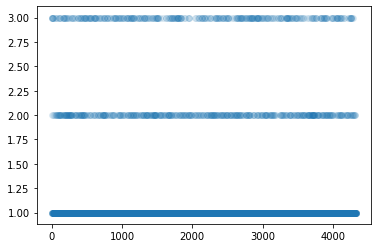

In [189]:
import matplotlib.pyplot as plt

plt.scatter(range(len(instances)), senses, alpha = 0.1)
plt.show()

*So if had just blindly followed the recommended code in the book, the test set would have been comprised solely of instances with sense 1.*

*Let's randomize the ordering of the instances.  The instances have to be converted to a `list` so that they can be shuffled:*

In [187]:
instances = list(instances)
random.shuffle(instances)

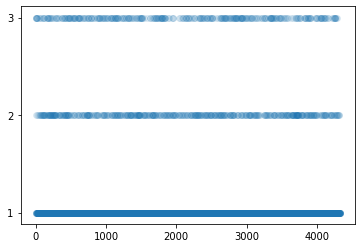

In [190]:
senses = [int(instances[i].senses[0][4]) for i in range(len(instances))]

plt.scatter(range(len(instances)), senses, alpha = 0.1)
plt.yticks([1, 2, 3])
plt.show()

*There aren't that many features we can extract from instances, and simple trial and error reveals that these are the best.*

In [203]:
def hard_features(inst):
    p = inst.position
    return {'left2':  inst.context[p - 2],
            'left1':  inst.context[p - 1],
            'right':  inst.context[p + 1]} 

In [204]:
hard_features(shuffled[0])

{'left2': ('but', 'CC'), 'left1': ('no', 'DT'), 'right': ('answers', 'NNS')}

In [205]:
featuresets = [(hard_features(n), n.senses) for n in instances]
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [206]:
nltk.classify.accuracy(classifier, test_set)

0.9030023094688222

*Creating feature, training, and test sets:*

In [207]:
classifier.classify(hard_features(instances[0]))

('HARD1',)

In [208]:
instances[0]

SensevalInstance(word='hard-a', position=3, context=[('``', '``'), ('it', 'PRP'), ("'s", 'VBZ'), ('hard', 'JJ'), ('to', 'TO'), ('play', 'VB'), ('against', 'IN'), ('them', 'PRP'), ('in', 'IN'), ('practice', 'NN'), ('and', 'CC'), ('they', 'PRP'), ('don', 'VBP'), ("'t", 'VBG'), ('even', 'RB'), ('tackle', 'VB'), ('us', 'PRP'), (';', ':'), ('what', 'WP'), ('they', 'PRP'), ('do', 'VBP'), ('is', 'VBZ'), ('something', 'NN'), ('called', 'VBD'), ('button-up', 'JJ'), ('(', '('), ('halt', 'NN'), ('the', 'DT'), ('runners', 'NNS'), (')', 'SYM'), ('and', 'CC'), ('it', 'PRP'), ('gets', 'VBZ'), ('so', 'RB'), ('physical', 'JJ'), ('out', 'IN'), ('there', 'EX'), ('and', 'CC'), ('they', 'PRP'), ('get', 'VBP'), ('so', 'RB'), ('pumped', 'VBN'), ('up', 'IN'), (',', ','), ('they', 'PRP'), ('just', 'RB'), ('forget', 'VBP'), ('that', 'IN'), ('we', 'PRP'), ("'re", 'VBP'), ('on', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('team', 'NN'), ('.', '.')], senses=('HARD1',))

##### 4.

☼ Using the movie review document classifier discussed in this chapter, generate a list of the 30 features that the classifier finds to be most informative. Can you explain why these particular features are informative? Do you find any of them surprising?

In [209]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [210]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [211]:
featuresets = [(document_features(d), c) for (d, c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [212]:
classifier.show_most_informative_features(30)

Most Informative Features
    contains(schumacher) = True              neg : pos    =      7.5 : 1.0
     contains(atrocious) = True              neg : pos    =      7.1 : 1.0
       contains(martian) = True              neg : pos    =      7.1 : 1.0
          contains(mena) = True              neg : pos    =      7.1 : 1.0
        contains(shoddy) = True              neg : pos    =      7.1 : 1.0
        contains(suvari) = True              neg : pos    =      7.1 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.1 : 1.0
        contains(turkey) = True              neg : pos    =      6.6 : 1.0
           contains(ugh) = True              neg : pos    =      5.8 : 1.0
       contains(bronson) = True              neg : pos    =      5.7 : 1.0
       contains(singers) = True              pos : neg    =      5.6 : 1.0
       contains(unravel) = True              pos : neg    =      5.6 : 1.0
        contains(justin) = True              neg : pos    =      5.4 : 1.0

*Most of the most informative features are strong adjectives (e.g., 'atrocious', 'shoddy', 'unimaginative', ...) so no surprise there .  There are also quite a few names, both first and last.  I was surprised to see the name 'welles' as one of the features, as this almost surely refers to Orson Welles, and the name highly correlates with a negative review.  While Orson Welles took on roles in some questionable movies later in life, his earlier films (e.g., "Citizen Kane") are considered to be masterpieces of cinema.*

##### 5. 

☼ Select one of the classification tasks described in this chapter, such as name gender detection, document classification, part-of-speech tagging, or dialog act classification. Using the same training and test data, and the same feature extractor, build three classifiers for the task: a decision tree, a naive Bayes classifier, and a Maximum Entropy classifier. Compare the performance of the three classifiers on your selected task. How do you think that your results might be different if you used a different feature extractor?

*I actually tried this exercise with several of the classification tasks from this chapter - namely, part-of-speech tagging, dialogue act classifcation, and name gender detection.  However, the decision tree classifier is so painfully slow - taking over 30 minutes in some cases - that I decided I could only use it with the most basic classification task, i.e., name gender detection.*

*As you can see below, the MaxEnt classifier had the best accuracy, followed by the Naive Bayes classifier and the Decision Tree.* 

In [11]:
def gender_features(word):
    return {'last_letter'  : word[-1],
            'length'       : len(word),
            'first_letter' : word[0],
            'last_2letters': word[-2:],
            'first_2letters': word[:2],
            'number_vowels': sum([1 for ch in word if ch in 'AEIOUaeiouy']),
            'first_vowel'  : [i for i in range(len(word)) 
                              if word[i] in 'AEIOUaeiouy'][0],
            'double_letters': sum([1 for ch in range(len(word) - 1)
                                  if word[ch] == word[ch + 1]])}

In [12]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [13]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.371
             2          -0.48462        0.735
             3          -0.41700        0.804
             4          -0.37818        0.816
             5          -0.35383        0.822
             6          -0.33730        0.826
             7          -0.32540        0.829
             8          -0.31643        0.831
             9          -0.30942        0.831
            10          -0.30379        0.833
            11          -0.29916        0.833
            12          -0.29528        0.834
            13          -0.29198        0.835
            14          -0.28913        0.835
            15          -0.28664        0.836
            16          -0.28445        0.837
            17          -0.28250        0.837
            18          -0.28075        0.837
            19          -0.27917        0.838
  

In [15]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

nltk.classify.accuracy(classifier, test_set)

0.748

In [17]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

nltk.classify.accuracy(classifier, test_set)

0.808

*For the sake of argument, I repeated the experiment with a very simple model.  In this case, the MaxEnt classifier performed the worst, and the Decision Tree and Naive Bayes classifier produced identical results:*

In [25]:
def gender_features(word):
    return {'last_letter'  : word[-1]}

In [26]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)

In [27]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, devtest_set, test_set = featuresets[1000:], featuresets[500:1000], featuresets[:500]
classifier = nltk.classify.MaxentClassifier.train(train_set, max_iter = 50)

  ==> Training (50 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.372
             2          -0.37746        0.760
             3          -0.37703        0.760
             4          -0.37676        0.760
             5          -0.37659        0.760
             6          -0.37646        0.760
             7          -0.37637        0.760
             8          -0.37630        0.760
             9          -0.37624        0.760
            10          -0.37619        0.760
            11          -0.37615        0.760
            12          -0.37612        0.760
            13          -0.37609        0.760
            14          -0.37606        0.760
            15          -0.37604        0.760
            16          -0.37602        0.760
            17          -0.37601        0.760
            18          -0.37599        0.760
            19          -0.37598        0.760
  

In [28]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

nltk.classify.accuracy(classifier, test_set)

0.778

In [29]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

nltk.classify.accuracy(classifier, test_set)

0.778

*I would argue that the iterative optimization of MaxEnt produces the best accuracy for all but the simplest models.  Decision trees don't do as well with complicated feature models, since they can't handle very well cases where values interact.   Naive Bayes classifiers do slightly better, but they also suffer in complicated models, since they can't handle correlation very well.*

##### 6. 

☼ The synonyms *strong* and *powerful* pattern differently (try combining them with *chip* and *sales*). What features are relevant in this distinction? Build a classifier that predicts when each word should be used.

*First, I converted `brown.sents()` into an `nltk.Text()` so that I could make concordances for both words:*

In [45]:
text = nltk.Text([w for s in brown.sents() for w in s])

In [46]:
text.concordance('strong')

Displaying 25 of 202 matches:
n . Georgia Republicans are getting strong encouragement to enter a candidate 
industry by Southern states , and a strong fight against discrimination in bus
cit on where I stand to bring you a strong , dynamic administration . I'm not 
using bill is expected to encounter strong opposition by the coalition of Sout
p with some good stops and showed a strong arm at third base . Bingles and bob
 aerials . Skorich , however , is a strong advocate of a balanced attack -- sp
and swept all championships . Carol Strong , 13 , of Cedar Mill cooked the cha
emain are those that were headed by strong executives , men with the abilities
s the only antidote -- a Biblically strong Christianity . So the Christian You
 control machinery . In the U. S. , strong pressures have been building up for
 the forthcoming encounter produced strong reactions in the U. S. of both appr
, Player said later , `` and I felt strong . When you're playing like that you
s and good nature and 

In [140]:
text.concordance('powerful')

Displaying 25 of 63 matches:
 . Cincinnati , Ohio ( AP ) -- The powerful New York Yankees won their 19th wo
ecrets off to Moscow , either on a powerful transmitter buried under the kitch
gerous precedent '' ! ! Cannon , a powerful , conservative man , brought welco
ker of the House , and second most powerful man in Washington . Mr. Rayburn wa
d . But these are side issues to a powerful central theme . That theme cuts th
 world is dominated by two large , powerful nations armed with murderous nucle
sively in his footsteps . When one powerful nation strives to emulate the succ
, because it provides a direct and powerful mirror in which the Negro can hear
( the charge-excess ) are far more powerful than gravitation , the surface hyd
world in balanced harmony around a powerful central axis . The tremendous emph
. But such a reaction obscures the powerful efforts made in the past by both N
ch a decision should have placed a powerful weapon in the hands of the entire 
, imagine that you can 

*Then I made lists containing all the sentences with either 'strong' or 'powerful'. In these sentences I replaced the two words with an ellipsis, and then placed each of these sentences in a tuple, along with a value that would identify whether the sentence used to conatain 'strong' or 'powerful':*

In [57]:
bts = brown.tagged_sents()
strong = [s for s in bts for t in s if 'strong' in t]

In [72]:
for s in strong:
    for i in range(len(s)):
        if s[i][0] == 'strong':
            s[i] = '_____'

In [78]:
labeled_strong = [(s, 'strong') for s in strong]

In [80]:
powerful = [s for s in bts for t in s if 'powerful' in t]

In [81]:
for s in powerful:
    for i in range(len(s)):
        if s[i][0] == 'powerful':
            s[i] = '_____'

In [82]:
labeled_powerful = [(s, 'powerful') for s in powerful]

*Example sentence:*

In [216]:
labeled_powerful[0]

([('--', '--'),
  ('The', 'AT'),
  '_____',
  ('New', 'JJ-TL'),
  ('York', 'NP-TL'),
  ('Yankees', 'NPS-TL'),
  ('won', 'VBD'),
  ('their', 'PP$'),
  ('19th', 'OD'),
  ('world', 'NN'),
  ('series', 'NN'),
  ('in', 'IN'),
  ('a', 'AT'),
  ('5-game', 'JJ'),
  ('romp', 'NN'),
  ('over', 'IN'),
  ('outclassed', 'VBN'),
  ('Cincinnati', 'NP'),
  (',', ','),
  ('crushing', 'VBG'),
  ('the', 'AT'),
  ('Reds', 'NNS-TL'),
  ('in', 'IN'),
  ('a', 'AT'),
  ('humiliating', 'JJ'),
  ('13-5', 'CD'),
  ('barrage', 'NN'),
  ('Monday', 'NR'),
  ('in', 'IN'),
  ('the', 'AT'),
  ('loosely', 'RB'),
  ('played', 'VBN'),
  ('finale', 'NN'),
  ('.', '.')],
 'powerful')

*My first idea for features was to look at the words immediately before and after the words in question.  After a little trial and error, I realized that the POS for these words wasn't helping, so I only looked at the words themselves:*

In [146]:
def adj_features(sent):
    p = sent.index('_____')
    if p >= 2:
        left2 = sent[p - 2][0]
    else:
        left2 = (None, None)
    if p >= 1:
        left1 = sent[p - 1][0]
    else:
        left1 = (None, None)
    return {'left2':  left2,
            'left1':  left1,
            'right':  sent[p + 1][0]} 

In [147]:
# checking the above function
adj_features(labeled_powerful[0][0])

{'left2': '--', 'left1': 'The', 'right': 'New'}

In [101]:
# concatenating and shuffling the sentences

labeled_sents = (labeled_strong + labeled_powerful)

random.shuffle(labeled_sents)

In [151]:
# training the classifier

featuresets = [(adj_features(s), adj) for (s, adj) in labeled_sents]
test_set, train_set = featuresets[:25], featuresets[25:]
classifier = nltk.classify.DecisionTreeClassifier.train(train_set)

In [152]:
nltk.classify.accuracy(classifier, test_set)

0.64

*The initial results are not good at all.  Since there are 265 sentences and 202 use the word 'strong', we could just select 'strong' for every sentence and get 76% accuracy.  We did worse than that.*

*I next decided to use as features all of the other words in the sentences.  I used code similar to that for document classification, where we made a dictionary containing all of the words in the sent.  These words were checked against the most common words in the Brown Corpus.  I repeated the experiment several times for different sizes of common words.*

In [209]:
vocab = [1000, 2000, 3000, 4000, 5000]
perfs = []

for v in vocab:
    all_words = nltk.FreqDist(w.lower() for w in brown.words())
    word_features = [w for w, _ in all_words.most_common(v)]

    def sent_features(sent):
        sent_words = set([t[0] for t in sent])
        features = {}
        for word in word_features:
            features['contains({})'.format(word)] = (word in sent_words)
        return features
    
    featuresets = [(sent_features(n), adj) for (n, adj) in labeled_sents]
    test_set, train_set = featuresets[:25], featuresets[25:]
    classifier = nltk.classify.NaiveBayesClassifier.train(train_set)
    
    perfs.append(nltk.classify.accuracy(classifier, test_set))

In [210]:
perfs

[0.76, 0.68, 0.76, 0.76, 0.76]

*The results are better, but they are still only comparable to what we would get if we simply chose the most common adjective ('strong') for every sentence.*

*I repeated the experiment with other classifiers: the decision tree classifier performs no better and takes very long to run.  The MaxEnt classifier only works with a small vocabulary size - when I tried to run the classifier with larger vocabularies, it only ran two iterations before throwing an error.*

*Although the results are not optimal, we also have to remember that our corpus is very small: only about 250 examples.  I would argue that it is perfectly reasonable to expect our accuracy to increase significantly with a large corpus.*

##### 7. 

◑ The dialog act classifier assigns labels to individual posts, without considering the context in which the post is found. However, dialog acts are highly dependent on context, and some sequences of dialog act are much more likely than others. For example, a ynQuestion dialog act is much more likely to be answered by a `yanswer` than by a `greeting`. Make use of this fact to build a consecutive classifier for labeling dialog acts. Be sure to consider what features might be useful. See the code for the consecutive classifier for part-of-speech tags in [1.7](https://www.nltk.org/book/ch06.html#code-consecutive-pos-tagger "1.7") to get some ideas.

In [36]:
post = nltk.corpus.nps_chat.xml_posts()

In [37]:
# Examining the posts

for i in range(20):
    print(post[i].text, post[i].get('class'))

now im left with this gay name Statement
:P Emotion
PART System
hey everyone   Greet
ah well Statement
NICK :10-19-20sUser7 System
10-19-20sUser7 is a gay name. Accept
.ACTION gives 10-19-20sUser121 a golf clap. System
:) Emotion
JOIN System
hi 10-19-20sUser59 Greet
26/ m/ ky women that are nice please pm me Statement
JOIN System
PART System
there ya go 10-19-20sUser7 Statement
don't golf clap me. Reject
fuck you 10-19-20sUser121:@ Reject
whats everyone up to? whQuestion
PART System
PART System


In [13]:
post_words = [w.lower() for i in range(len(post)) 
              for w in post[i].text.split()]
fd = nltk.FreqDist(post_words)
word_features = [w for (w, _) in fd.most_common(2000)]

In [27]:
def dialog_features(post, i):
    post_words = set(post[i].text.split())
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in post_words)
    if i == 0:
        features["prev-class"] = "<START>"
    else:
        features["prev-class"] = post[i - 1].get('class')
    return features

In [25]:
set(post[0].text.split())

{'gay', 'im', 'left', 'name', 'now', 'this', 'with'}

In [43]:
featuresets = []
for i in range(len(post)):
    featuresets.append( (dialog_features(post, i), post[i].get('class') ) )

In [45]:
size = int(len(featuresets) * 0.9)
train_set, test_set = featuresets[:size], featuresets[size:]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [52]:
classes = set([c for (_, c) in featuresets])
len(classes)

15

In [53]:
print(classes, end = '')

{'Clarify', 'yAnswer', 'Bye', 'Reject', 'Emotion', 'Continuer', 'Other', 'System', 'ynQuestion', 'nAnswer', 'Statement', 'Emphasis', 'Accept', 'whQuestion', 'Greet'}

*It takes a while to evaluate accuracy, but considering the number of classes (15) and how little time I put into this classifier, I think 67% accuracy is rather good.*

In [46]:
nltk.classify.accuracy(classifier, test_set)

0.674550614947966

##### 8. 

◑ Word features can be very useful for performing document classification, since the words that appear in a document give a strong indication about what its semantic content is. However, many words occur very infrequently, and some of the most informative words in a document may never have occurred in our training data. One solution is to make use of a __lexicon__, which describes how different words relate to one another. Using WordNet lexicon, augment the movie review document classifier presented in this chapter to use features that generalize the words that appear in a document, making it more likely that they will match words found in the training data.

In [59]:
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [80]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = [w for (w, _) in all_words.most_common(2000)]

In [156]:
from nltk.corpus import wordnet as wn

def document_features(document):
    document_words = set(document)
    features = {}
    for word in document_words:
        # if word amongst most common words, 
        # report that this word is in the document,
        # otherwise, get wordnet synset
        if word in word_features:
            features['contains({})'.format(word)] = True
        else:
            ws = wn.synsets(word) # not bothering with POS
            if ws != []:
                features['{}'.format(ws[0])] = True
    return features
                

In [157]:
featuresets = [(document_features(d), c) for (d, c) in documents]


In [158]:
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [159]:
nltk.classify.accuracy(classifier, test_set)

0.76

*The baseline classifier exemplified in the book - which didn't use WordNet - had an accuracy of .81, so this one is slightly worse.  One immediate issue is that some last names (e.g., 'Damon') are actually listed in WordNet, although it's clear that the WordNet definition does not refer to the movie star:*

In [160]:
classifier.show_most_informative_features(30)

Most Informative Features
Synset('brilliant.s.03') = True              pos : neg    =     12.7 : 1.0
   Synset('feeble.s.01') = True              neg : pos    =     11.5 : 1.0
Synset('outstanding.s.01') = True              pos : neg    =     11.5 : 1.0
     Synset('deft.s.01') = True              pos : neg    =     10.4 : 1.0
    Synset('damon.n.01') = True              pos : neg    =     10.3 : 1.0
     Synset('flop.n.02') = True              neg : pos    =     10.2 : 1.0
   Synset('hudson.n.01') = True              neg : pos    =     10.2 : 1.0
 Synset('seamless.a.01') = True              pos : neg    =      9.8 : 1.0
 Synset('thematic.a.01') = True              pos : neg    =      9.8 : 1.0
  Synset('immerse.v.01') = True              pos : neg    =      9.5 : 1.0
     Synset('diss.v.01') = True              neg : pos    =      9.2 : 1.0
Synset('accessible.a.01') = True              pos : neg    =      9.1 : 1.0
   Synset('annual.n.01') = True              pos : neg    =      9.1 : 

In [169]:
# not the guy in Good Will Hunting

wn.synset('damon.n.01').definition()

'the friend of Phintias who pledged his life that Phintias would return (4th century BC)'

*I tried repeating the experiment with various vocabulary thresholds - i.e., for words not amongst the $n$ most common words, the features classifier would use the WordNet synset. As the results show, there wasn't a tremendous difference between word sizes:*

In [161]:
vocab = [500, 1000, 1500, 2000, 2500, 3000]
perfs = []

for v in vocab:


    all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
    word_features = [w for (w, _) in all_words.most_common(v)]

    from nltk.corpus import wordnet as wn

    def document_features(document):
        document_words = set(document)
        features = {}
        for word in document_words:
            if word in word_features:
                features['contains({})'.format(word)] = True
            else:
                ws = wn.synsets(word)
                if ws != []:
                    features['{}'.format(ws[0])] = True
        return features


    featuresets = [(document_features(d), c) for (d, c) in documents]


    train_set, test_set = featuresets[100:], featuresets[:100]
    classifier = nltk.NaiveBayesClassifier.train(train_set)

    perfs.append(nltk.classify.accuracy(classifier, test_set))

In [168]:
perfs

[0.76, 0.77, 0.77, 0.77, 0.78, 0.78]

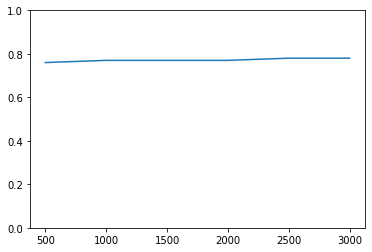

In [167]:
import matplotlib.pyplot as plt

plt.plot(vocab, perfs)
plt.ylim(0, 1.0)
plt.show()

##### 9. 

★ The PP Attachment Corpus is a corpus describing prepositional phrase attachment decisions. Each instance in the corpus is encoded as a `PPAttachment` object:

```
from nltk.corpus import ppattach
ppattach.attachments('training')

[PPAttachment(sent='0', verb='join', noun1='board', prep='as', noun2='director', attachment='V'), PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'), ...]

inst = ppattach.attachments('training')[1]
(inst.noun1, inst.prep, inst.noun2)

```
Select only the instances where inst.attachment is N:

```
nattach = [inst for inst in ppattach.attachments('training') 
           if inst.attachment == 'N']
```
Using this sub-corpus, build a classifier that attempts to predict which preposition is used to connect a given pair of nouns. For example, given the pair of nouns "team" and "researchers," the classifier should predict the preposition "of". See the corpus HOWTO at http://nltk.org/howto for more information on using the PP attachment corpus.


In [170]:
from nltk.corpus import ppattach
ppattach.attachments('training')

[PPAttachment(sent='0', verb='join', noun1='board', prep='as', noun2='director', attachment='V'), PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'), ...]

In [171]:
inst = ppattach.attachments('training')[1]
(inst.noun1, inst.prep, inst.noun2)

('chairman', 'of', 'N.V.')

In [172]:
nattach = [inst for inst in ppattach.attachments('training') 
           if inst.attachment == 'N']

In [175]:
nattach[:5]

[PPAttachment(sent='1', verb='is', noun1='chairman', prep='of', noun2='N.V.', attachment='N'),
 PPAttachment(sent='2', verb='named', noun1='director', prep='of', noun2='conglomerate', attachment='N'),
 PPAttachment(sent='3', verb='caused', noun1='percentage', prep='of', noun2='deaths', attachment='N'),
 PPAttachment(sent='9', verb='is', noun1='asbestos', prep='in', noun2='products', attachment='N'),
 PPAttachment(sent='12', verb='led', noun1='team', prep='of', noun2='researchers', attachment='N')]

*There are really only three variables of interest here: `verb`, `noun1`, and `noun2`.  Through simple trial and error we can determine the most relevant one is `noun1`, which makes sense: if we have a phrase that starts with "a team of ...", it doesn't matter which noun follows the phrase, nor does it matter which verb comes before it.*

In [202]:
def prep_features(inst):
    features = {'noun1': inst.noun1}
    
    return features
    

In [203]:
# double checking the feature extractor
prep_features(nattach[0])

{'noun1': 'chairman'}

In [209]:
featuresets = [(prep_features(inst), inst.prep) for inst in nattach]

size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]

In [210]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [211]:
nltk.classify.accuracy(classifier, test_set)

0.647329650092081

*The performance of the classifier isn't spectacular.  If we just assigned "of" to every case, we'd have an accuracy of 51%.  However, there are 59 possible prepositions, and there really aren't any other features we can extract...*

In [208]:
preps = [p for (_, p) in featuresets]
len(set(preps))

59

In [189]:
fd = nltk.FreqDist(preps)

In [192]:
fd['of']/len(preps)

0.508697653014266

##### 10.

★ Suppose you wanted to automatically generate a prose description of a scene, and already had a word to uniquely describe each entity, such as *the jar*, and simply wanted to decide whether to use *in* or *on* in relating various items, e.g. *the book is in the cupboard* vs *the book is on the shelf*. Explore this issue by looking at corpus data; writing programs as needed.
		
* a.		in the car *versus* on the train

* b.		in town *versus* on campus

* c.		in the picture *versus* on the screen

* d.		in Macbeth *versus* on Letterman


In [214]:
from nltk.corpus import brown
bts = brown.tagged_sents()

*I made a function that will pull out those sentences containing a given phrase:*

In [280]:
def find_sents(corpus, *words):
    """
    Returns from a tagged corpus sentences that 
    contain a phrase.  Words in the phrase must be
    in the same order as listed in the arguments.
    
    Arguments:
    corpus: Tagged corpus.
    *words: Words in the phrase to be matched.  Words
            must be in the order in which they are to be found.
    """
    
    sents = []
    lw = len(words)
    for s in corpus:
        flag = False
        for i in range(len(s) - lw):
            for j in range(lw):
                if s[i + j][0] == words[j]:
                    flag = True
                else:
                    flag = False
                    break
            if flag:
                sents.append(s)
    return sents

In [281]:
car = find_sents(bts, "in", "the", "car")

In [285]:
train = find_sents(bts, "on", "the", "train")

In [289]:
town = find_sents(bts, "in", "town")

In [291]:
campus = find_sents(bts, "on", "campus")

In [293]:
picture = find_sents(bts, "in", "the", "picture")

In [296]:
screen = find_sents(bts, "on", "the", "screen")

In [298]:
Macbeth = find_sents(bts, "in", "Macbeth")

In [300]:
Letterman = find_sents(bts, "on", "Letterman")

In [303]:
sets = [car, train, town, campus, picture, screen, Macbeth, Letterman]
for s in sets:
    print(len(s))

9
8
21
1
5
6
1
0


*Considering how rarely any of the phrases occur in the largest corpus available in the NLTK (the Brown Corpus), it will be impossible to do this experiment currently.  There are larger corpora available online (e.g., COCA), but these have to be purchased, and are not cheap (approx. \$250).  The upshot is that I won't be able to complete this problem at this time.* 